## Tom Segal's Notebook for the Titanic Competition ##

In this project, textual information on the passangers of the famous Titanic cruise ship is given and correlations are to be found between the different parameters and the survival probabilities of the passengers.

In this project I experimented with different pandas functions for observing, plotting and modifying the dataframe structures, including converting between different data types and creating new columns out of existing information.

I then experimented with different models for analysing the data including Gaussian Naive Bayes, Logistic Regression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier and RandomForestClassifier.

I would like to acknowledge the great support of the kaggle.com community. Thanks for providing such quality learning resources.

This notebook relies on the following notebooks for research and reference:

https://www.kaggle.com/alexisbcook/titanic-tutorial

https://www.kaggle.com/zlatankr/titanic-random-forest-82-78

https://www.kaggle.com/startupsci/titanic-data-science-solutions

additional resources:

https://www.kaggle.com/viratkothari/understanding-random-forest-algorithm

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

https://en.wikipedia.org/wiki/Logistic_regression

https://en.wikipedia.org/wiki/Support_vector_machine

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://en.wikipedia.org/wiki/Decision_tree_learning

https://en.wikipedia.org/wiki/Random_forest



## import libraries ##

In [5]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 402 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=dca136fccbf4f9a1baae664a450e04af32f9b67e8dfe94d1082a8f7ee1b2938d
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# plotting decision trees
#from sklearn.externals.six import StringIO # removed in version 0.23
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# import data ##

In [7]:
# get the paths of the files by clicking on "copy path" next to the file
# names at the top-right corner of the kaggle.com UI under "data"
path_train = "../input/titanic/train.csv"
path_test = "../input/titanic/test.csv"
path_submission = "../input/titanic/gender_submission.csv"

# read the data into pandas dataframes
dataframe_train = pd.read_csv(path_train)
dataframe_test = pd.read_csv(path_test)
dataframe_submission = pd.read_csv(path_submission)

# since many actions will be performed on both databases,
# they will be grouped
dataframes = [dataframe_train, dataframe_test]

## analyse the train data ##

next the train data will be analysed by counting it, observing the min and max values of the different parameters and quickly trying to find some rough correlations to see which parameters might be especially relevant.

## count the train data ##

In [8]:
print(dataframe_train.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


## observe the train data ##

In [9]:
dataframe_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## check for columns containing undefined values ##

In [10]:
dataframe_names = ["Train","Test"]
i = 0
for dataframe in dataframes:
    print("dataframe " + str(dataframe_names[i]) + ":")
    i += 1
    # print("does Survived contains undefined values? " + str(dataframe["Survived"].isnull().any()))
    print("does Pclass contains undefined values? " + str(dataframe["Pclass"].isnull().any()))
    print("does Name contains undefined values? " + str(dataframe["Name"].isnull().any()))
    print("does Sex contains undefined values? " + str(dataframe["Sex"].isnull().any()))
    print("does Age contains undefined values? " + str(dataframe["Age"].isnull().any()))
    print("does SibSp contains undefined values? " + str(dataframe["SibSp"].isnull().any()))
    print("does Parch contains undefined values? " + str(dataframe["Parch"].isnull().any()))
    print("does Ticket contains undefined values? " + str(dataframe["Ticket"].isnull().any()))
    print("does Fare contains undefined values? " + str(dataframe["Fare"].isnull().any()))
    print("does Cabin contains undefined values? " + str(dataframe["Cabin"].isnull().any()))
    print("does Embarked contains undefined values? " + str(dataframe["Embarked"].isnull().any()))

dataframe Train:
does Pclass contains undefined values? False
does Name contains undefined values? False
does Sex contains undefined values? False
does Age contains undefined values? True
does SibSp contains undefined values? False
does Parch contains undefined values? False
does Ticket contains undefined values? False
does Fare contains undefined values? False
does Cabin contains undefined values? True
does Embarked contains undefined values? True
dataframe Test:
does Pclass contains undefined values? False
does Name contains undefined values? False
does Sex contains undefined values? False
does Age contains undefined values? True
does SibSp contains undefined values? False
does Parch contains undefined values? False
does Ticket contains undefined values? False
does Fare contains undefined values? True
does Cabin contains undefined values? True
does Embarked contains undefined values? False


it is shown that for the train data, there are undefined values in Age, Cabin and Embarked, and for the test data, there are undefined values in Age, Fare and Cabin

## how many defined values in each column ? ##

In [11]:
i = 0
for dataframe in dataframes:
    print("dataframe " + str(dataframe_names[i]) + ":")
    i += 1
    num_null_Age = sum(dataframe["Age"].isnull())
    print("Age contains " + str(num_null_Age) + " undefined values")
    num_null_Cabin = sum(dataframe["Cabin"].isnull())
    print("Cabin contains " + str(num_null_Cabin) + " undefined values")
    num_null_Fare = sum(dataframe["Fare"].isnull())
    print("Fare contains " + str(num_null_Fare) + " undefined values")
    num_null_Embarked = sum(dataframe["Embarked"].isnull())
    print("Embarked contains " + str(num_null_Embarked) + " undefined values")
    num_columns = dataframe.count()[0]
    print("the rest contain only defined values and " + str(num_columns) + " in total")
    print('\n')


dataframe Train:
Age contains 177 undefined values
Cabin contains 687 undefined values
Fare contains 0 undefined values
Embarked contains 2 undefined values
the rest contain only defined values and 891 in total


dataframe Test:
Age contains 86 undefined values
Cabin contains 327 undefined values
Fare contains 1 undefined values
Embarked contains 0 undefined values
the rest contain only defined values and 418 in total




in dataframe_train, the 2 rows with undefined Embarked values can be deleted. Same for the single row with the undefined Fare value in dataframe_test. The rest are significant enough that more complex solutions should be found for them.

## find the ranges of some of the columns ## 

In [12]:
i = 0
for dataframe in dataframes:
    print("dataframe " + str(dataframe_names[i]) + ":")
    i += 1
    print("Age ranges between values " + str(dataframe["Age"].min())
    + " - " + str(dataframe["Age"].max()))

    print("Pclass ranges between values " + str(dataframe["Pclass"].min())
    + " - " + str(dataframe["Pclass"].max()))

    print("SibSp ranges between values " + str(dataframe["SibSp"].min())
    + " - " + str(dataframe["SibSp"].max()))

    print("Parch ranges between values " + str(dataframe["Parch"].min())
    + " - " + str(dataframe["Parch"].max()))

    print("Fare ranges between values " + str(dataframe["Fare"].min())
    + " - " + str(dataframe["Fare"].max()))
    print('\n')



dataframe Train:
Age ranges between values 0.42 - 80.0
Pclass ranges between values 1 - 3
SibSp ranges between values 0 - 8
Parch ranges between values 0 - 6
Fare ranges between values 0.0 - 512.3292


dataframe Test:
Age ranges between values 0.17 - 76.0
Pclass ranges between values 1 - 3
SibSp ranges between values 0 - 8
Parch ranges between values 0 - 9
Fare ranges between values 0.0 - 512.3292




## look for patterns in the data ##

look for simple correlations of the data columns with the "survived" column

## Pclass ##

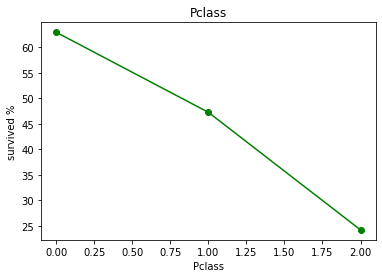

In [13]:
corr = []
for value in range(1,3+1):
    corr_match_columns = dataframe_train.loc[dataframe_train.Pclass == value]["Survived"]
    corr_match_number = sum(corr_match_columns)
    corr_match_ratio = 100* corr_match_number / len(dataframe_train.loc[dataframe_train.Pclass == value])
    corr.append(corr_match_ratio)
fig, ax = plt.subplots()
ax.plot(corr, 'g-o')
ax.set(xlabel="Pclass", ylabel="survived %", title = "Pclass")
plt.show()

## Name ##

it seems weird to me to try to find some correlation between the names themselves and the survival rate, however not between the title and the survival rate, as the title could also correlate with things like age or fare.

In [14]:
i = 0
for dataframe in dataframes:
    i += 1
    # generate the titles list
    titles = dataframe["Name"].apply(lambda x: x.split(" ")[1])
    # add it to the dataframe
    dataframe["Title"] = titles 
    # replace Ms with Miss
    dataframe["Title"].replace("Ms", "Miss")
    # display it
    dataframe["Title"].value_counts()

get the first 6 values

In [15]:
i = 0
for dataframe in dataframes:
    print("dataframe " + str(dataframe_names[i]) + ":")
    i += 1
    name_values = dataframe["Name"].apply(lambda x: x.split(" ")[1]).value_counts()[:6].index.tolist()
    print(name_values)

dataframe Train:
['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.']
dataframe Test:
['Mr.', 'Miss.', 'Mrs.', 'Master.', 'y', 'Billiard,']


convert the titles, which are categorical values, to ordinal values


In [16]:
title_mapping = {'Mr.': 1, 'Miss.': 2, 'Mrs.': 3, 'Master.': 4, 'Dr.': 5, 'Rev.': 6}
for dataframe in dataframes:
    dataframe["Title"] = dataframe["Title"].map(title_mapping)
    # the previous line created lots of nulls which the next line replaces with 0's                 
    dataframe["Title"] = dataframe["Title"].fillna(0)                

display the results

In [17]:
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [18]:
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0


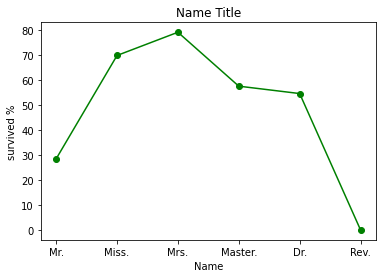

In [19]:
name_values = ["Mr.", "Miss.", "Mrs.", "Master.", "Dr.", "Rev."]
corr = []
names_axis = []
for value in name_values:
    matching_rows = dataframe_train.loc[dataframe_train["Name"].str.contains(value)] 
    matching_rows_survived = matching_rows.loc[matching_rows.Survived == 1].count()[0]
    if matching_rows_survived is None:
        matching_rows_survived = 0
    matching_rows_not_survived = matching_rows.loc[matching_rows.Survived == 0].count()[0]
    if matching_rows_not_survived is None:
        matching_rows_not_survived = 0
    if matching_rows_survived + matching_rows_not_survived != 0:
        corr_match_ratio = 100.0 * matching_rows_survived / (matching_rows_survived + matching_rows_not_survived)
    corr.append(corr_match_ratio)
    names_axis.append(value)
fig, ax = plt.subplots()
ax.plot(names_axis, corr, 'g-o')
ax.set(xlabel="Name", ylabel="survived %", title = "Name Title")
plt.show()

it is shown that females are more likely to survive than males, as shown below.

## sex ##

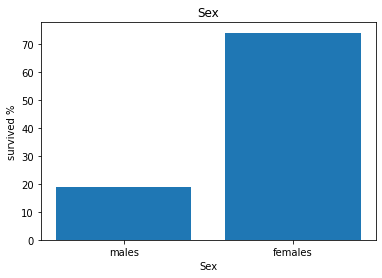

In [20]:
females = dataframe_train.loc[dataframe_train.Sex == "female"]
females_survived = females.loc[females.Survived == 1]
females_survival_ratio = 100 * females_survived.count()[0] / females.count()[0]

males = dataframe_train.loc[dataframe_train.Sex == "male"]
males_survived = males.loc[males.Survived == 1]
males_survival_ratio = 100 * males_survived.count()[0] / males.count()[0]

fix, ax = plt.subplots()
x = [0,1]
plt.bar(x,[males_survival_ratio, females_survival_ratio])
plt.xticks(x, ("males","females"))
ax.set(xlabel="Sex", ylabel="survived %", title = "Sex")
plt.show()

females have a much higher survival probability compared to males.

convert Sex from categorical to numerical

In [21]:
sex_mapping = {"male": 0, "female": 1}
for dataframe in dataframes:
    dataframe["Sex"] = dataframe["Sex"].map(sex_mapping)

display the result

In [22]:
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0


In [23]:
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3.0


## Age ##

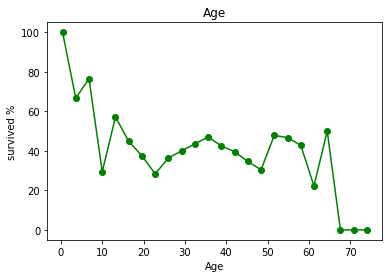

In [24]:
Age_min = 0.42
Age_max = 80
num_bins = 25
step_size = Age_max/num_bins
num_columns_defined = num_columns - num_null_Age
ages = np.arange(Age_min,Age_max,step_size)
corr = []
ages_axis = []
for value in ages:
    previous_value = value - step_size
    matching_rows = dataframe_train.loc[dataframe_train.Age >= previous_value]
    matching_rows = matching_rows.loc[matching_rows.Age <= value]
    matching_rows_survived = matching_rows.loc[matching_rows.Survived == 1].count()[0]
    if matching_rows_survived is None:
        matching_rows_survived = 0
    matching_rows_not_survived = matching_rows.loc[matching_rows.Survived == 0].count()[0]
    if matching_rows_not_survived is None:
        matching_rows_not_survived = 0
    if matching_rows_survived + matching_rows_not_survived != 0:
        matching_rows_ratio = 100.0 * matching_rows_survived / (matching_rows_survived + matching_rows_not_survived)
        corr.append(matching_rows_ratio)
        ages_axis.append(value)
fig, ax = plt.subplots()
ax.plot(ages_axis,corr, "g-o")
ax.set(xlabel="Age", ylabel="survived %", title = "Age")
plt.show()

passangers aged less than about 10 have a significantly higher probability to survive, more than about 60 have a significantly lower proability to survive and for the rest the probability is more or less constant.

## alternative method ##

In [25]:
# qcut discretizes variables into equally large buckets
dataframe_train["Survived"].groupby(pd.qcut(dataframe_train["Age"],10)).mean()

Age
(0.419, 14.0]    0.584416
(14.0, 19.0]     0.390805
(19.0, 22.0]     0.283582
(22.0, 25.0]     0.371429
(25.0, 28.0]     0.393443
(28.0, 31.8]     0.393939
(31.8, 36.0]     0.483516
(36.0, 41.0]     0.358491
(41.0, 50.0]     0.397436
(50.0, 80.0]     0.343750
Name: Survived, dtype: float64

the higher Pclass the lower the survival chances in an approximately linear fashion.

## SibSp ##

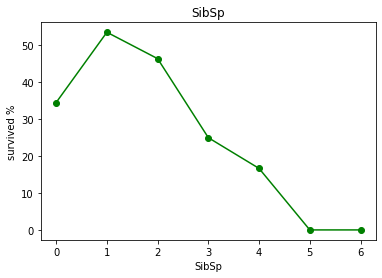

In [26]:
corr = []
# note how the values 6,7 were skipped because there are 0 entries containing them
for value in [0,1,2,3,4,5,8]:
    corr_match_columns = dataframe_train.loc[dataframe_train.SibSp == value]["Survived"]
    corr_match_number = sum(corr_match_columns)
    corr_match_ratio = 100 * corr_match_number / len(dataframe_train.loc[dataframe_train.SibSp == value])
    corr.append(corr_match_ratio)
fig, ax = plt.subplots()
ax.plot(corr, 'g-o')
ax.set(xlabel="SibSp", ylabel="survived %", title = "SibSp")
plt.show()

the higher SibSp the lower the survival chances in an approximately linear fashion, at least at the range of [1,5].

## Parch ##

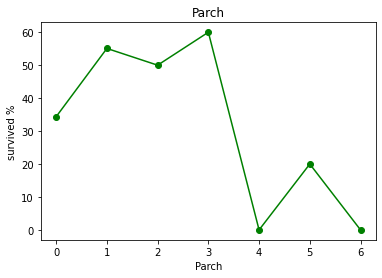

In [27]:
corr = []
for value in range(0,7):
    corr_match_columns = dataframe_train.loc[dataframe_train.Parch == value]["Survived"]
    corr_match_number = sum(corr_match_columns)
    corr_match_ratio = 100 * corr_match_number / len(dataframe_train.loc[dataframe_train.Parch == value])
    corr.append(corr_match_ratio)
fig, ax = plt.subplots()
ax.plot(corr, 'g-o')
ax.set(xlabel="Parch", ylabel="survived %", title = "Parch")
plt.show()

Averaging the data into 2 bins, [0,3] and [4,6], there seems to be about a 40% drop in survival probability from the first bin to the second.

## Fare ##

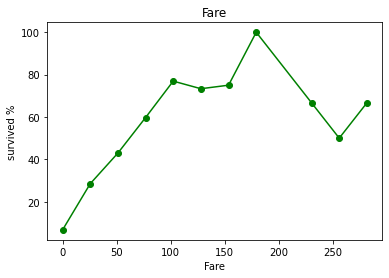

In [28]:
Fare_min = 0
Fare_max = 512.3292
num_bins = 20
step_size = Fare_max/num_bins
num_columns_defined = num_columns
fares = np.arange(Fare_min,Fare_max,step_size)
corr = []
fares_axis = []
for value in fares:
    previous_value = value - step_size
    matching_rows = dataframe_train.loc[dataframe_train.Fare >= previous_value]
    matching_rows = matching_rows.loc[matching_rows.Fare <= value]
    matching_rows_survived = matching_rows.loc[matching_rows.Survived == 1].count()[0]
    if matching_rows_survived is None:
        matching_rows_survived = 0
    matching_rows_not_survived = matching_rows.loc[matching_rows.Survived == 0].count()[0]
    if matching_rows_not_survived is None:
        matching_rows_not_survived = 0
    if matching_rows_survived + matching_rows_not_survived != 0:
        matching_rows_ratio = 100.0 * matching_rows_survived / (matching_rows_survived + matching_rows_not_survived)
        corr.append(matching_rows_ratio)
        fares_axis.append(value)
fig, ax = plt.subplots()
ax.plot(fares_axis,corr, "g-o")
ax.set(xlabel="Fare", ylabel="survived %", title = "Fare")
plt.show()

the survival probability scales linearly with the fare up until around 100 from which it is independent.

## Embarked ## 

display all unique values of Embarked

In [29]:
dataframe_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

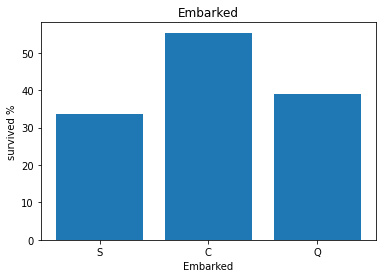

In [30]:
embarked_values = ['S', 'C', 'Q']
corr = []
for value in embarked_values:
    matching_rows = dataframe_train.loc[dataframe_train.Embarked == value]
    matching_rows_survived = matching_rows.loc[matching_rows.Survived == 1].count()[0]
    matching_rows_not_survived = matching_rows.loc[matching_rows.Survived == 0].count()[0]
    matching_rows_ratio = 100.0 * matching_rows_survived / (matching_rows_survived + matching_rows_not_survived)
    corr.append(matching_rows_ratio)
fig, ax = plt.subplots()
#ax.plot(corr, 'g-o')
plt.bar(embarked_values,corr)
ax.set(xlabel="Embarked", ylabel="survived %", title = "Embarked")
#plt.xticks(range(3),embarked_values)
plt.show()

seems passangers with Embarked = C have a slightly higher chance of survival.

## turn embarked to numerical categorical ##

In [31]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
dataframe_train["Embarked"] = dataframe_train["Embarked"].map(embarked_mapping)
dataframe_test["Embarked"] = dataframe_test["Embarked"].map(embarked_mapping)

## correlations between columns ##

correlation between SibSp (family size) and fare

In [32]:
pd.crosstab(pd.qcut(dataframe_train["Fare"],5), columns=dataframe_train["SibSp"])

SibSp,0,1,2,3,4,5,8
Fare,,,,,,,
"(-0.001, 7.854]",167,12,0,0,0,0,0
"(7.854, 10.5]",174,6,3,0,1,0,0
"(10.5, 21.679]",99,59,9,5,0,0,0
"(21.679, 39.688]",91,56,8,8,17,0,0
"(39.688, 512.329]",77,76,8,3,0,5,7


it is shown that larger families tend to pay more fare as intuitively expected.

correlation between Pclass and Age

In [33]:
pd.crosstab(pd.qcut(dataframe_train["Age"],3), columns = dataframe_train["Pclass"])

Pclass,1,2,3
Age,,,
"(0.419, 23.0]",32,48,166
"(23.0, 34.0]",41,72,119
"(34.0, 80.0]",113,53,70


it is shown that older people tend to be of a higher class

In [34]:
ages_mean = [(0.419 + 23.0)/2, (23.0 + 34.0)/2, (34.0 + 80.0)/2]
print(ages_mean)

[11.7095, 28.5, 57.0]


the mean age values for each class will be used to fill the null values

## treat the null values ##

it was shown that for the train data, there are undefined values in Age, Cabin and Embarked, and for the test data, there are undefined values in Age, Fare and Cabin

## treat the Age null values ##

fill null Age values with the mean age value corresponding to that person's class
thanks to https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

In [35]:
def replace_age_na(values):
    # "-1" because values (Pclass) = [1,3] but we need [0,2]
    #return [ages_mean[value-1] for value in values]
    return ages_mean[values-1]
for dataframe in dataframes:
    Age_nonull = dataframe.apply(lambda row: replace_age_na(row["Pclass"]) if np.isnan(row["Age"]) else row["Age"] ,axis = 1)
    pd.DataFrame(Age_nonull).value_counts()
    dataframe["Age"] = Age_nonull

show the results

In [36]:
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1.0


In [37]:
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,3.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,1.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,3.0


## convert age to categorical numeric ##

or, since age was already treated using 3 groups, it will also be modified to ordinals based on these 3 groups

In [38]:
for dataframe in dataframes:
    dataframe.loc[dataframe['Age'] <= 11.7095, 'Age'] = 0
    dataframe.loc[(dataframe['Age'] > 11.7095) & (dataframe['Age'] <= 28.5), 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 28.5) & (dataframe['Age'] <= 57.0), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 57.0), 'Age'] = 3

display the results

In [39]:
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,1.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,1.0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,1.0,1.0


In [40]:
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,3,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,7.0000,NaN,1,3.0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,3,1.0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,NaN,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,1,3.0


at this point the only columns containing null values are Cabin and Embarked for train and Cabin and Fare for Test.

## treat the null Embarked ##

In [41]:
sum(dataframe_train["Embarked"].isnull())

2

there are only 2 null Embarked values, so the corresponding rows will be deleted.

In [42]:
dataframe_train = dataframe_train.dropna(axis = 0, how = 'all', subset = ['Embarked'])

## treat the null Fare ##

similarly, there is only one null Fare value in Test, so that row would have simply been removed, only that that would make the submission file invalid, so it is instead set to the average value.

In [43]:
dataframe_test["Fare"].mean()

35.6271884892086

In [44]:
#dataframe_test = dataframe_test.dropna(axis = 0, how = 'all', subset = ['Fare'])
dataframe_test = dataframe_test.fillna(value = dataframe_test["Fare"].mean())

## normalize Fare ##

In [45]:
i = 0
for dataframe in dataframes:
    Fare_max = dataframe["Fare"].max()
    Fare_min = dataframe["Fare"].min()
    Fare_std = dataframe["Fare"].std()
    print("Fare max, min & std for dataframe " + str(dataframe_names[i]) + " are: " + str(Fare_max) + " " + str(Fare_min) + " " + str(Fare_std))
    dataframe["Fare"] = (dataframe["Fare"]-Fare_min)/Fare_max
    Fare_max = dataframe["Fare"].max()
    Fare_min = dataframe["Fare"].min()
    Fare_std = dataframe["Fare"].std()
    print("after normalization: " + str(Fare_max) + " " + str(Fare_min) + " " + str(Fare_std))

Fare max, min & std for dataframe Train are: 512.3292 0.0 49.693428597180905
after normalization: 1.0 0.0 0.09699511290237
Fare max, min & std for dataframe Train are: 512.3292 0.0 55.90757617997383
after normalization: 1.0 0.0 0.10912432119811603


## drop irrelevant columns ##

it was decided to drop the PassengerId, Name, Ticket and Cabin. This speeds up the training process and does not change the result as the columns will anyways not be used.

In [46]:
dataframe_train = dataframe_train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
dataframe_test_PassengerId = dataframe_test["PassengerId"] # used for the submission
dataframe_test = dataframe_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [47]:
dataframe_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,1.0,1.0
1,1,1,1,2.0,1,0,71.2833,2.0,3.0
2,1,3,1,1.0,0,0,7.9250,1.0,2.0
3,1,1,1,2.0,1,0,53.1000,1.0,3.0
4,0,3,0,2.0,0,0,8.0500,1.0,1.0


In [48]:
dataframe_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2.0,0,0,7.8292,3,1.0
1,3,1,2.0,1,0,7.0000,1,3.0
2,2,0,3.0,0,0,9.6875,3,1.0
3,3,0,1.0,0,0,8.6625,1,1.0
4,3,1,1.0,1,1,12.2875,1,3.0


any null values left?

In [49]:
dataframe_train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Title       False
dtype: bool

In [50]:
dataframe_test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Title       False
dtype: bool

no null values left.

## split the data in preparation for fitting ##

In [51]:
dataframe_train_x = dataframe_train.drop("Survived", axis = 1)
dataframe_train_y = dataframe_train["Survived"]

## model - Naive Bayes ## 

Naive Bayes is called naive because it assumes that the different variables are independent, which was shown above to be false so a poor result is expected. It uses the Baye's theorem.
More on wikipedia https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [52]:
NB_model = GaussianNB()
NB_model.fit(dataframe_train_x, dataframe_train_y)
NB_prediction = NB_model.predict(dataframe_test)
NB_accuracy = NB_model.score(dataframe_train_x, dataframe_train_y)
print("accuracy of the Naive Bayes model: " + str(NB_accuracy))


accuracy of the Naive Bayes model: 0.8053993250843644


## model - Logistic Regression ##

logistic models are used to determine the probability of some binary event such as in this case, survival. See https://en.wikipedia.org/wiki/Logistic_regression

In [53]:
LR_model = LogisticRegression()
LR_model.fit(dataframe_train_x, dataframe_train_y)
LR_prediction = LR_model.predict(dataframe_test)
LR_accuracy = LR_model.score(dataframe_train_x, dataframe_train_y)
print("accuracy of the Logistic Regression model: " + str(LR_accuracy))

accuracy of the Logistic Regression model: 0.8020247469066367


about the same as for NB.

create a new data frame containing the column names and the correlations found for them

In [54]:
dataframe_correlations = pd.DataFrame()
# delete(0) deletes the Survived column
dataframe_correlations['Feature'] = dataframe_train.columns.delete(0)
dataframe_correlations["Correlations"] = LR_model.coef_[0]

In [55]:
dataframe_correlations.head(8)

,Feature,Correlations
0,Pclass,-0.838947
1,Sex,2.252121
2,Age,-0.330997
3,SibSp,-0.330866
4,Parch,-0.200528
5,Fare,0.003729
6,Embarked,0.266683
7,Title,0.471389


## results ##

it is shown that Sex has the highest correlation, and after that Pclass (in absolute value) and then Title.

## model - Support Vector Machines (SVM) ##

SVMs are supervised (like for the data that we have). SVMs represent the data points as points in space with a mapping such that the data points are divided into 2 groups as clearly as possible, Survived False and True.
https://en.wikipedia.org/wiki/Support_vector_machine

In [56]:
SVC_model = SVC()
SVC_model.fit(dataframe_train_x, dataframe_train_y)
SVC_predictions = SVC_model.predict(dataframe_test)
SVC_accuracy = SVC_model.score(dataframe_train_x, dataframe_train_y)
print("accuracy of the SVC model: " + str(SVC_accuracy))

accuracy of the SVC model: 0.6805399325084365


so far the Naive Bayes is the best.

## Model - K-Nearest-Neighbors (KNN) ##

In KNN, the data is represented as points in a multi-dimensional feature space which each has a label. Each new data point is then assigned a label according to its K nearest neighbours where K is an input parameter. Different metrics can be used such as the Euclidean distance metric for most cases or in the case of text classification such as here, the overlap metric / Hamming distance.
More on Wikipedia https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [57]:
neighbors = range(1,11)
for neighbor in neighbors:
    print(neighbor)
    KNN_model = KNeighborsClassifier(n_neighbors = neighbor)
    KNN_model.fit(dataframe_train_x, dataframe_train_y)
    KNN_prediction = KNN_model.predict(dataframe_test)
    KNN_accuracy = KNN_model.score(dataframe_train_x, dataframe_train_y)
    print("accuracy of the KNN model for " + str(neighbor) + " nearest neighbours: " + str(round(KNN_accuracy,3)))

1
accuracy of the KNN model for 1 nearest neighbours: 0.906
2
accuracy of the KNN model for 2 nearest neighbours: 0.872
3
accuracy of the KNN model for 3 nearest neighbours: 0.875
4
accuracy of the KNN model for 4 nearest neighbours: 0.852
5
accuracy of the KNN model for 5 nearest neighbours: 0.848
6
accuracy of the KNN model for 6 nearest neighbours: 0.843
7
accuracy of the KNN model for 7 nearest neighbours: 0.834
8
accuracy of the KNN model for 8 nearest neighbours: 0.832
9
accuracy of the KNN model for 9 nearest neighbours: 0.829
10
accuracy of the KNN model for 10 nearest neighbours: 0.825


for K=1 an accuracy of 90.6% is obtained. So far KNN is the best.

## model - Decision Tree ##

a decision tree finds conjuctions of features which branch the survival probability with maximal entropy (equally) until class labels in the form of leaves are reached.
More on Wikipedia https://en.wikipedia.org/wiki/Decision_tree_learning

In [58]:
DT_model = DecisionTreeClassifier()
DT_model.fit(dataframe_train_x, dataframe_train_y)
DT_predictions = DT_model.predict(dataframe_test)
DT_accuracy = DT_model.score(dataframe_train_x, dataframe_train_y)
print("accuracy of the DT model: " + str(DT_accuracy))

accuracy of the DT model: 0.9471316085489314


the accuracy is 94.7%, such that so far the decision tree is the best model.

## plot the decision tree ##

see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (even though one library is outdated, see the Imports window at the top)

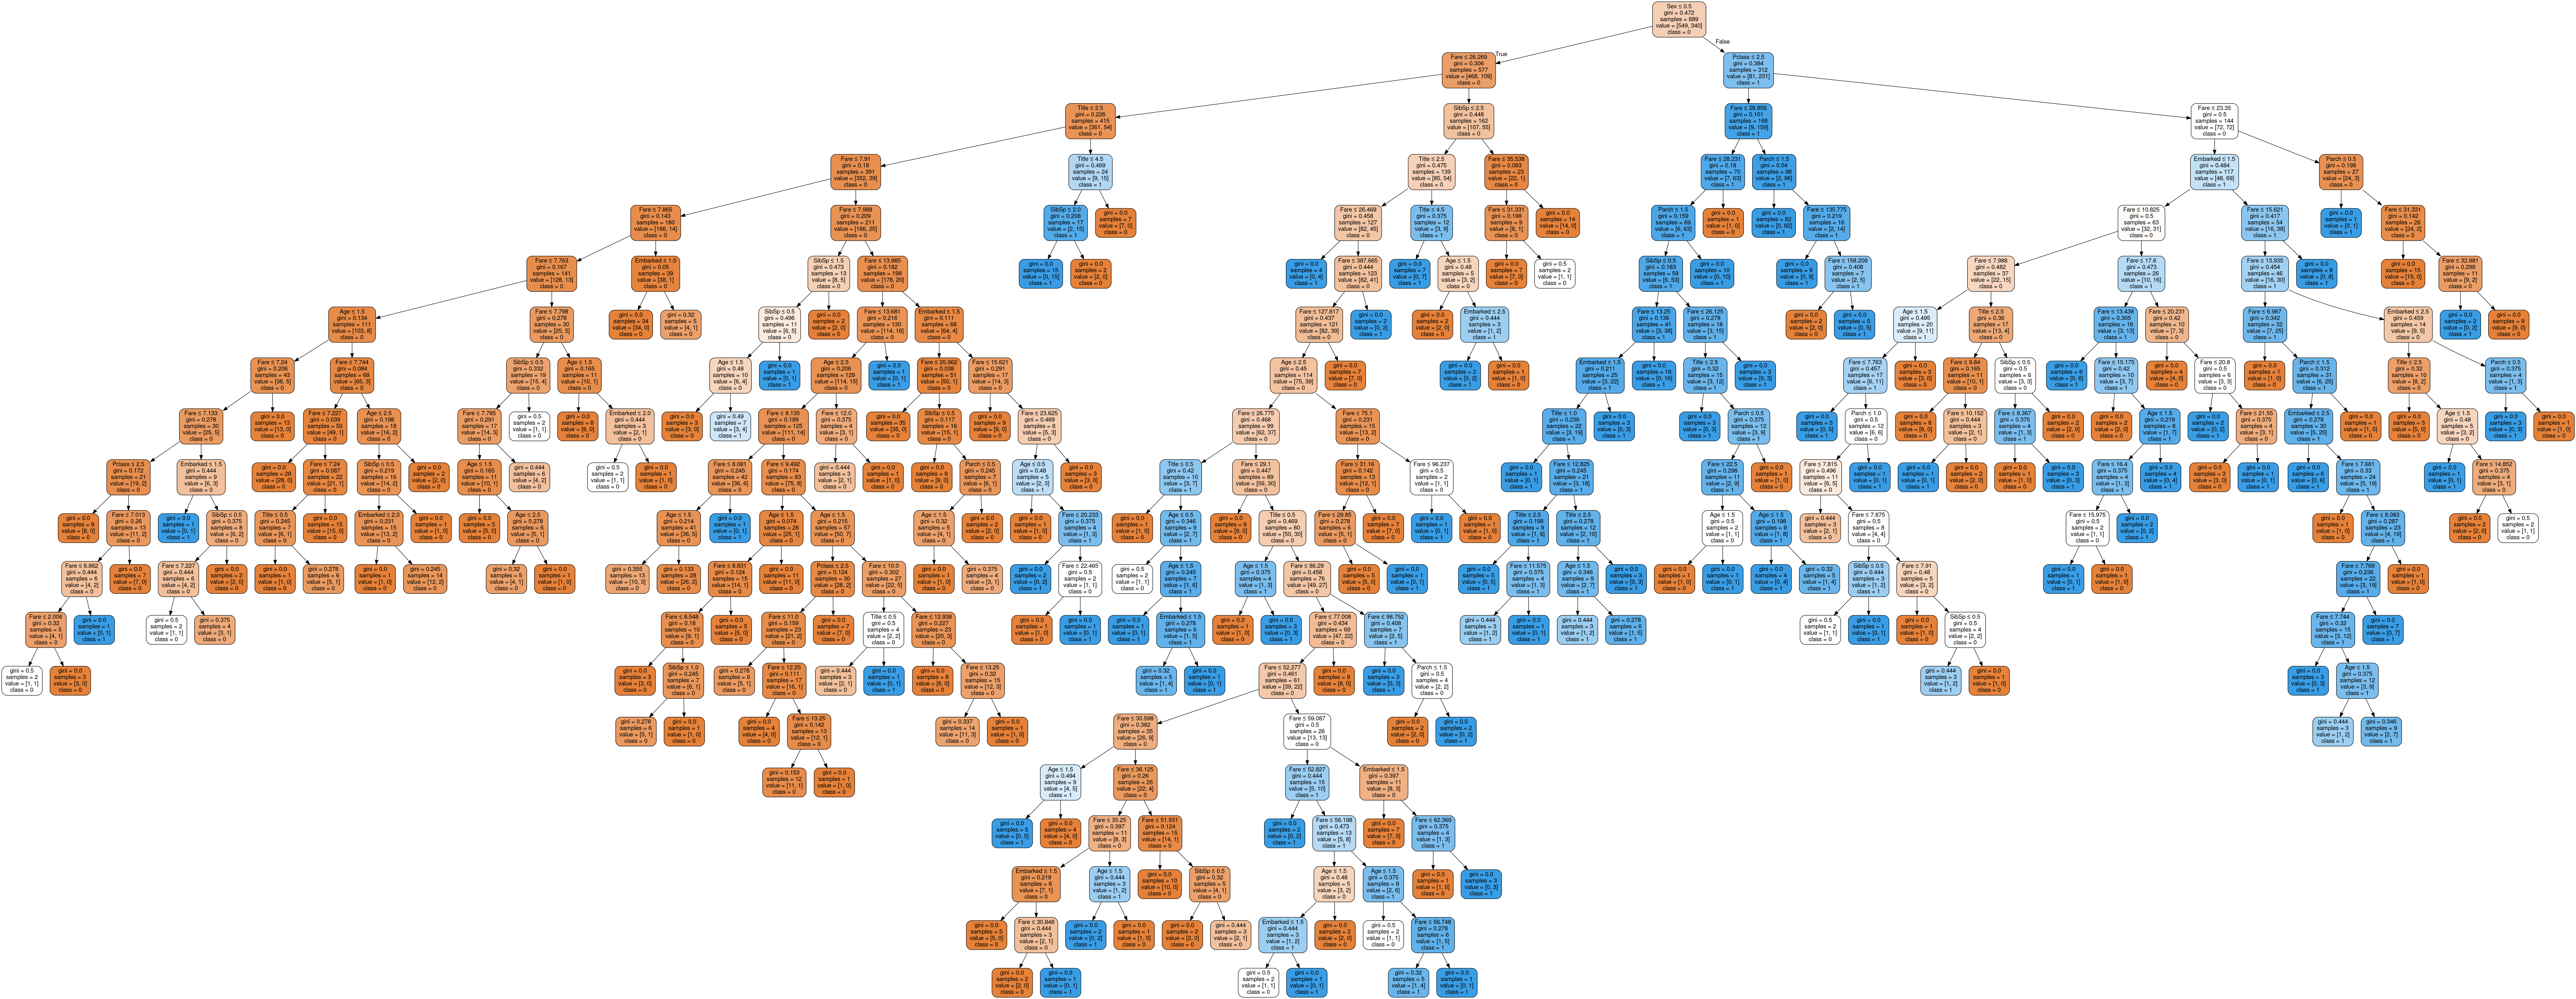

In [59]:
dot_data = StringIO()
export_graphviz(DT_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = dataframe_train.columns.delete(0),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT.png')
Image(graph.create_png())

this tree is too complicated to plot.
Using a more simple tree with defined maximum depths

In [60]:
depths = range(1,21)
for depth in depths:
    DT_model = DecisionTreeClassifier(max_depth = depth)
    DT_model.fit(dataframe_train_x, dataframe_train_y)
    DT_predictions = DT_model.predict(dataframe_test)
    DT_accuracy = DT_model.score(dataframe_train_x, dataframe_train_y)
    print("accuracy of the DT model: " + str(DT_accuracy))

accuracy of the DT model: 0.7862767154105736
accuracy of the DT model: 0.7862767154105736
accuracy of the DT model: 0.8166479190101237
accuracy of the DT model: 0.8346456692913385
accuracy of the DT model: 0.8492688413948256
accuracy of the DT model: 0.8683914510686164
accuracy of the DT model: 0.8785151856017998
accuracy of the DT model: 0.8863892013498312
accuracy of the DT model: 0.9010123734533183
accuracy of the DT model: 0.9088863892013498
accuracy of the DT model: 0.9156355455568054
accuracy of the DT model: 0.922384701912261
accuracy of the DT model: 0.9246344206974129
accuracy of the DT model: 0.9268841394825647
accuracy of the DT model: 0.9336332958380202
accuracy of the DT model: 0.9403824521934758
accuracy of the DT model: 0.9437570303712036
accuracy of the DT model: 0.9460067491563554
accuracy of the DT model: 0.9471316085489314
accuracy of the DT model: 0.9471316085489314


it is shown that the accuracy reached at before is reached with about 20 levels of depth. For visualization less levels of depth will be used:

In [61]:
DT_model = DecisionTreeClassifier(max_depth = 3)
DT_model.fit(dataframe_train_x, dataframe_train_y)
DT_predictions = DT_model.predict(dataframe_test)
DT_accuracy = DT_model.score(dataframe_train_x, dataframe_train_y)
print("accuracy of the DT model: " + str(DT_accuracy))

accuracy of the DT model: 0.8166479190101237


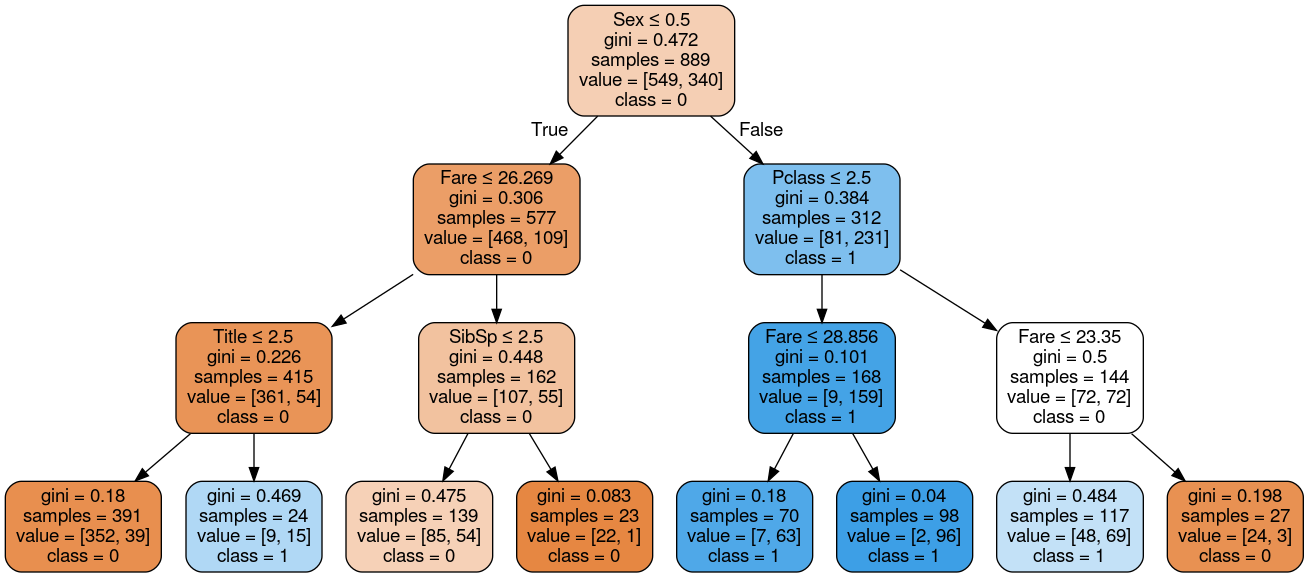

In [62]:
dot_data = StringIO()
export_graphviz(DT_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = dataframe_train.columns.delete(0),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT.png')
Image(graph.create_png())

it is shown that the tree first divides according to Sex as that parameter has the largest correlation. 

## model - random forest ##

random forests are a collection of decision trees like the one above which are all considered to arrive at a mean prediction.
More on Wikipedia https://en.wikipedia.org/wiki/Random_forest

In [63]:
estimators = np.arange(1,100,10)
for estimator in estimators:
    RF_model = RandomForestClassifier(n_estimators = estimator)
    RF_model.fit(dataframe_train_x, dataframe_train_y)
    RF_prediction = RF_model.predict(dataframe_test)
    RF_accuracy = RF_model.score(dataframe_train_x, dataframe_train_y)
    print("accuracy of the Random Forest model with " + str(estimator) + " estimators is :" + str(round(RF_accuracy,3)))

accuracy of the Random Forest model with 1 estimators is :0.891
accuracy of the Random Forest model with 11 estimators is :0.939
accuracy of the Random Forest model with 21 estimators is :0.945
accuracy of the Random Forest model with 31 estimators is :0.946
accuracy of the Random Forest model with 41 estimators is :0.946
accuracy of the Random Forest model with 51 estimators is :0.947
accuracy of the Random Forest model with 61 estimators is :0.946
accuracy of the Random Forest model with 71 estimators is :0.947
accuracy of the Random Forest model with 81 estimators is :0.947
accuracy of the Random Forest model with 91 estimators is :0.947


it is shown that the accuracy converges around 40 estimators to 94.7%. It is the best model.

## model accuracy summary ##

accuracy of the Naive Bayes model: 0.8053993250843644

accuracy of the Logistic Regression model: 0.8020247469066367

accuracy of the SVC model: 0.6805399325084365

for K=1 an accuracy of 90.6% is obtained. So far KNN is the best.

accuracy of the DT model: 0.9471316085489314

accuracy of the Random Forest model with 41 estimators is :0.947

## submitting the results ##

In [64]:
submission = pd.DataFrame({"PassengerId": dataframe_test_PassengerId,
                          "Survived": RF_prediction})
submission.to_csv('submission.csv', index = False)

!kaggle competitions submit -c titanic -f "outout/submission.csv" -m "Tom Segal's Submission For The TItan Competition"